# ASX Equity Return & Risk Analysis
## Case Study: Commonwealth Bank of Australia (CBA.AX)
*This project was completed as a self-directed finance analysis exercise to develop practical Python-based investment analysis skills*

## Project Overview

**Objective:** <br>
This project analyses the historical performance and risk profile of an ASX-listed equity using Python. The analysis focuses on return generation, volatility, and downside risk to support an investment-oriented assessment.

**Scope:**
* **Market:** Australian Securities Exchange (ASX)
* **Asset:** Commonwealth Bank of Australia (CBA.AX)
* **Data:** Daily adjusted price data from January 2022 onwards

**Methodology:** <br>
Historical price data is used to calculate returns and risk metrics, which are then interpreted from an investment perspective

## Data Source & Assumptions

**Data Source:** <br>
Yahoo Finance (via <code>yfinance</code> Python library)

**Assumptions:**
* Prices are adjusted for corporate actions (dividends)
* 252 trading days per year
* Returns are calculated using simple percentage returns

**Limitations:**
* Analysis is based solely on historical price data
* Does not incorporate valuation or macroeconomic factors

## Data Collection & Preparation

The following section retrieves historical price data for CBA and prepares it for return analysis.

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# selecting ticker to analyse
ticker = "CBA.AX"

# downloading historical price data
data = yf.download(ticker, start="2022-01-01", auto_adjust=True)
data = data[['Close']]
data.columns = ['Price']
data.rename(columns={'Close': 'Price'}, inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Price
Date,
2022-01-04,88.328308
2022-01-05,88.922836
2022-01-06,86.139694
2022-01-07,88.448936
2022-01-10,89.026245


## Return Calculation
Daily returns are calculated as the percentage change in prices. These returns form the basis for all subsequent risk and performance metrics.

In [8]:
# calculating daily returns
data['Daily_Return'] = data['Price'].pct_change()
data.dropna(inplace=True)

## Risk & Performance Metrics
The following metrics are used to assess the stock's risk-return profile:
* **Annualised return:** Measures average yearly performance
* **Annualised volatility:** Measures variability of returns (risk)
* **Maximum drawdown:** Measures the largest observed loss from peak to trough

In [9]:
# calculating key risk and return metrics
annual_return = data['Daily_Return'].mean() * 252
annual_volatility = data['Daily_Return'].std() * np.sqrt(252) 

cumulative = (1 + data['Daily_Return']).cumprod()
rolling_max = cumulative.cummax()
drawdown = cumulative / rolling_max - 1
max_drawdown = drawdown.min()

## Summary Statistics

In [10]:
# printing results
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

# visualising performance

Annual Return: 15.59%
Annual Volatility: 19.52%
Maximum Drawdown: -19.73%


## Visual performance analysis
The following charts provide a visual representation of price performance, cumulative returns, and drawdowns

### Price Chart

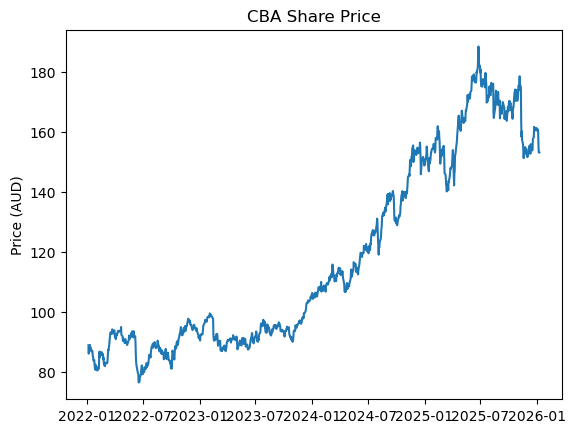

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data.index, data['Price'])
plt.title("CBA Share Price")
plt.ylabel("Price (AUD)")
plt.show()

### Theoretical Growth of A$1

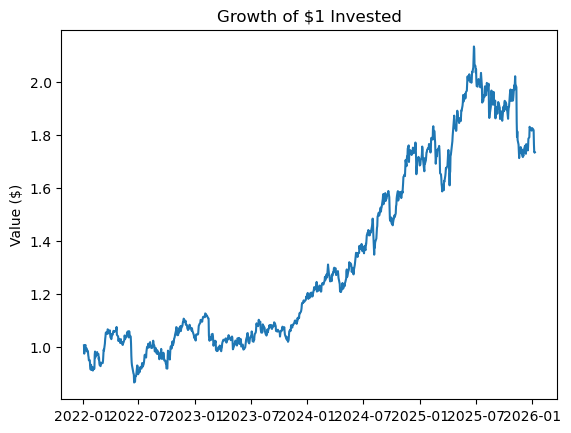

In [12]:
plt.figure()
plt.plot(cumulative)
plt.title("Growth of $1 Invested")
plt.ylabel("Value ($)")
plt.show()

### Drawdown Chart

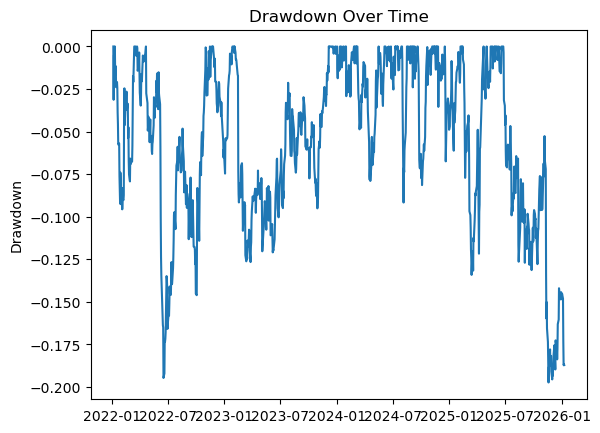

In [13]:
plt.figure()
plt.plot(drawdown)
plt.title("Drawdown Over Time")
plt.ylabel("Drawdown")
plt.show()